# Exploring Weather Trends - Project Instructions
### Summary
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

### Instructions
Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

- Extract the data from the database. There's a workspace in the previous section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.
    - Write a SQL query to extract the city level data. Export to CSV.
    - Write a SQL query to extract the global data. Export to CSV.

- Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.

- Create a line chart that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).

- Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
    - Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    - How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    - What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

@ Ali Gökgül - 18 March 2020

In [1]:
import warnings #to disable warnings
warnings.filterwarnings('ignore') #disables warnings

## 1. Extract data from database

#### City Data

In [ ]:
select * from city_data

#### City List

In [ ]:
select * from city_list

#### Globa Data

In [ ]:
select * from global_data

## 2. Reading CSV files

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
city_data = pd.read_csv('city_data.csv')

In [5]:
city_list = pd.read_csv('city_list.csv')

In [6]:
global_data = pd.read_csv('global_data.csv')

## 3. Exploring data

In [7]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70792 entries, 0 to 70791
Data columns (total 4 columns):
year        70792 non-null int64
city        70792 non-null object
country     70792 non-null object
avg_temp    68245 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [8]:
city_data.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [9]:
city_list.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [10]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


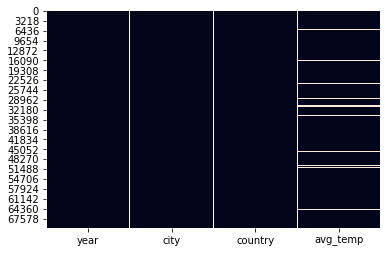

In [11]:
sns.heatmap(city_data.isnull(), cbar=False)

The avg_temp has some missing data

In [12]:
city_data[city_data['country'] == 'Germany'].head().dropna()

,year,city,country,avg_temp
8990,1743,Berlin,Germany,6.33
8991,1744,Berlin,Germany,10.36
8992,1745,Berlin,Germany,1.43


### Start and end year city_data and global_data

In [13]:
minYear_city_data = city_data['year'].unique().min()
maxYear_city_data = city_data['year'].unique().max()
minYear_global_data = global_data['year'].unique().min()
maxYear_global_data = global_data['year'].unique().max()

In [14]:
print("Min year for city_data: %d and min year for global data %d " % (minYear_city_data, minYear_global_data))

Min year for city_data: 1743 and min year for global data 1750 


In [15]:
print("Max year for city_data: %d and max year for global data %d " % (maxYear_city_data, maxYear_global_data))

Max year for city_data: 2013 and max year for global data 2015 


### Number of countries

In [16]:
# all countries without duplicates
len(city_data['country'].unique())

135

In [17]:
# all data
len(city_data['country'])

70792

### Min / Max values

In [18]:
# City Berlin
minValue_Berlin = city_data[city_data['city'] == 'Berlin']['avg_temp'].min()
maxValue_Berlin = city_data[city_data['city'] == 'Berlin']['avg_temp'].max()
minValue_Global = global_data['avg_temp'].min()
maxValue_Global = global_data['avg_temp'].max()

In [19]:
print("Min Value Berlin: %d°, Min Value Global %d°" % (minValue_Berlin, minValue_Global))

Min Value Berlin: 1°, Min Value Global 5°


In [20]:
print("Max Value Berlin: %d°, Max Value Global %d°" % (maxValue_Berlin, maxValue_Global))

Max Value Berlin: 10°, Max Value Global 9°


## 4. Line Chart

In [21]:
expl = city_data[city_data['city'] == 'Berlin'].dropna()
expl.head()

,year,city,country,avg_temp
8990,1743,Berlin,Germany,6.33
8991,1744,Berlin,Germany,10.36
8992,1745,Berlin,Germany,1.43
8997,1750,Berlin,Germany,9.83
8998,1751,Berlin,Germany,9.75


In [24]:
city_data = city_data[city_data['city'] == 'Berlin']
data_city = city_data.iloc[:,[0,3]]
data_city.set_index('year', drop=True, inplace=True)

In [25]:
global_data.set_index('year', drop=True, inplace=True)

In [55]:
def drawSingleChart(title, data, x_label, y_label):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.plot(data)  
    plt.xlabel(x_label)
    plt.ylabel(y_label)

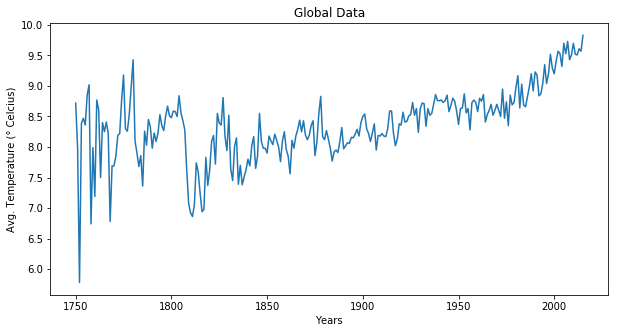

In [62]:
drawSingleChart("Global Data", global_data, 'Years', 'Avg. Temperature (° Celcius)')

The Avg. Temp of the global data increased contantly over the years.

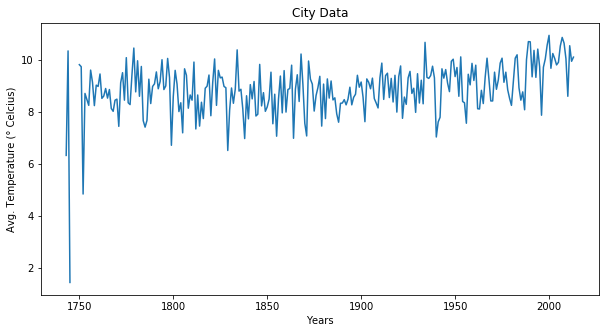

In [63]:
drawSingleChart("City Data", data_city, 'Years', 'Avg. Temperature (° Celcius)')

The Avg. Temp of the city berlin increased minimal over the year but it is increasind constantly

#### 7 day moving average

In [64]:
def drawMultiChart(title, data, data2, x_label, y_label):
    plt.figure(figsize=(15,5))
    plt.title(title)
    plt.plot(data2, label="Global")  
    plt.plot(data, linestyle='dashed', label="City")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

In [65]:
sevenDaysMovingAvgGlobal = global_data.rolling(7).mean()
sevenDaysMovingAvgCity = data_city.rolling(7).mean()

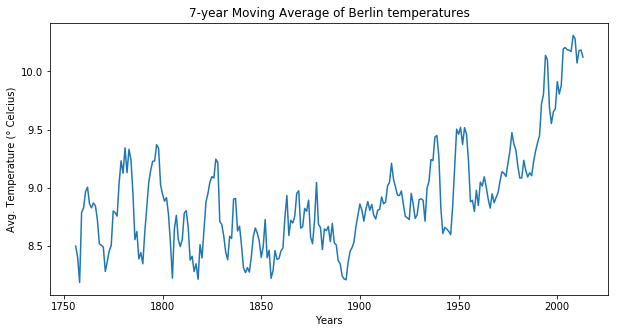

In [66]:
drawSingleChart('7-year Moving Average of Berlin temperatures', sevenDaysMovingAvgCity, 'Years', 'Avg. Temperature (° Celcius)')

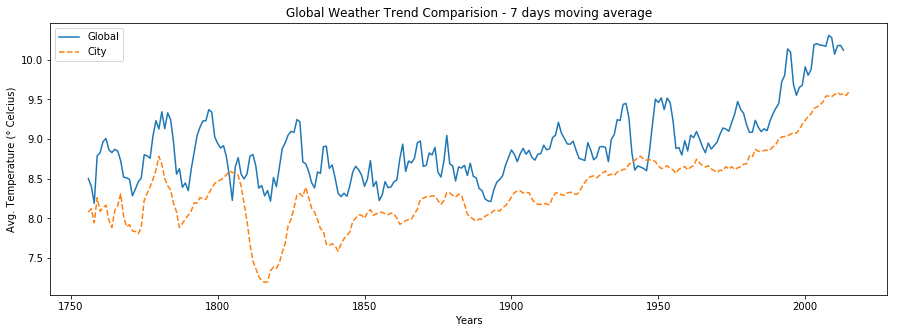

In [68]:
drawMultiChart('Global Weather Trend Comparision - 7 days moving average', sevenDaysMovingAvgGlobal, sevenDaysMovingAvgCity, 
             'Years', 'Avg. Temperature (° Celcius)' )

The average temperature of the global trend is close the city Berlin. Both Avg Temp are increasing constantly. The global avg. temperature is higher than the avg. temperature of the city berlin. This means that the temperature of the world increased over the the decades. 